<a href="https://colab.research.google.com/github/marcinmichalsmolen/adam/blob/main/MGR1_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CIFAR-10 

In [1]:
from keras.datasets import cifar10 as dataset
from tensorflow.keras.utils import to_categorical
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from matplotlib import pyplot
from keras.callbacks import EarlyStopping

In [4]:
def load_data():
  (x_train, y_train), (x_test, y_test) = dataset.load_data()
  y_train = to_categorical(y_train)
  y_test = to_categorical(y_test)
  return x_train, y_train, x_test, y_test

In [13]:
def normalize_pixels(tmp_train, tmp_test):
# Zamiana na zmiennoprzecinkowe
  x_train = tmp_train.astype('float32')
  x_test = tmp_test.astype('float32')
# Normalizacja
  x_train = x_train / 255.0
  x_test = x_test / 255.0
  return x_train, x_test

In [23]:
from keras.optimizers import Adam

def define_model_1(learning_rate=0.001, decay_rate=0.0):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    optimizer = Adam(lr=learning_rate, decay=decay_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [24]:
def summarize_diagnostics(history):
  pyplot.title('Dokładność klasyfikacji')
  pyplot.plot(history.history['accuracy'], color='orange', label='train')
  pyplot.plot(history.history['val_accuracy'], color='green', label='test')
  pyplot.subplots_adjust (right=2)
  pyplot.show()

def run_model(model_number):
  output = model_number.fit(x_train, y_train, epochs=100, batch_size=1024, validation_split=(0.2),callbacks=[callbacks])
  # evaluate model
  _, acc = model_number.evaluate(x_test, y_test)
  print('Accuracy = %.3f' % (acc * 100.0))
  summarize_diagnostics(output)
  return

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/100
40/40 [==============================] - 2s 33ms/step - loss: 2.0122 - accuracy: 0.2865 - val_loss: 1.7756 - val_accuracy: 0.3670
Epoch 2/100
40/40 [==============================] - 1s 21ms/step - loss: 1.6458 - accuracy: 0.4260 - val_loss: 1.5908 - val_accuracy: 0.4355
Epoch 3/100
40/40 [==============================] - 1s 21ms/step - loss: 1.4979 - accuracy: 0.4771 - val_loss: 1.4715 - val_accuracy: 0.4797
Epoch 4/100
40/40 [==============================] - 1s 21ms/step - loss: 1.4031 - accuracy: 0.5099 - val_loss: 1.4032 - val_accuracy: 0.5058
Epoch 5/100
40/40 [==============================] - 1s 21ms/step - loss: 1.3466 - accuracy: 0.5257 - val_loss: 1.4776 - val_accuracy: 0.4804
Epoch 6/100
40/40 [==============================] - 1s 19ms/step - loss: 1.3290 - accuracy: 0.5339 - val_loss: 1.3459 - val_accuracy: 0.5229
Epoch 7/100
40/40 [==============================] - 1s 19ms/step - loss: 1.2719 - accuracy: 0.5546 - val_loss: 1.3019 - val_accuracy: 0.5446
Epoch 

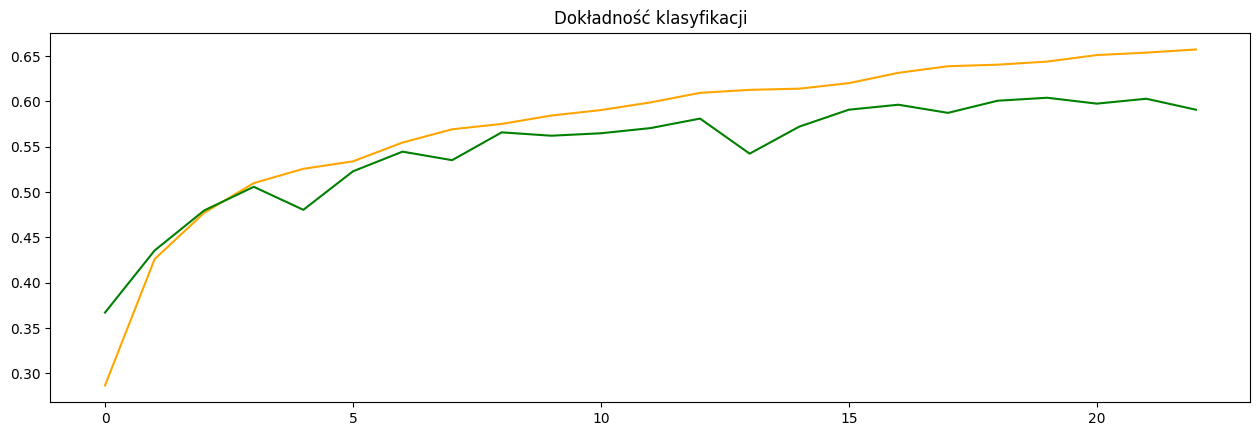

In [25]:
x_train, y_train, x_test, y_test = load_data()
x_train, x_test = normalize_pixels(x_train, x_test)
callbacks = EarlyStopping(monitor='val_loss', mode='min', patience=3)
model_1 = define_model_1()
graph_output = run_model(model_1)

In [28]:
def define_model_2(learning_rate=0.0005, decay_rate=0.0001):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    optimizer = Adam(lr=learning_rate, decay=decay_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/100
40/40 [==============================] - 2s 33ms/step - loss: 2.0032 - accuracy: 0.2891 - val_loss: 1.8272 - val_accuracy: 0.3566
Epoch 2/100
40/40 [==============================] - 1s 21ms/step - loss: 1.7170 - accuracy: 0.4054 - val_loss: 1.6603 - val_accuracy: 0.4172
Epoch 3/100
40/40 [==============================] - 1s 19ms/step - loss: 1.5615 - accuracy: 0.4615 - val_loss: 1.5116 - val_accuracy: 0.4821
Epoch 4/100
40/40 [==============================] - 1s 19ms/step - loss: 1.4541 - accuracy: 0.4938 - val_loss: 1.4526 - val_accuracy: 0.4951
Epoch 5/100
40/40 [==============================] - 1s 26ms/step - loss: 1.3930 - accuracy: 0.5156 - val_loss: 1.4301 - val_accuracy: 0.5030
Epoch 6/100
40/40 [==============================] - 1s 24ms/step - loss: 1.3426 - accuracy: 0.5341 - val_loss: 1.3590 - val_accuracy: 0.5259
Epoch 7/100
40/40 [==============================] - 1s 24ms/step - loss: 1.3037 - accuracy: 0.5459 - val_loss: 1.3410 - val_accuracy: 0.5354
Epoch 

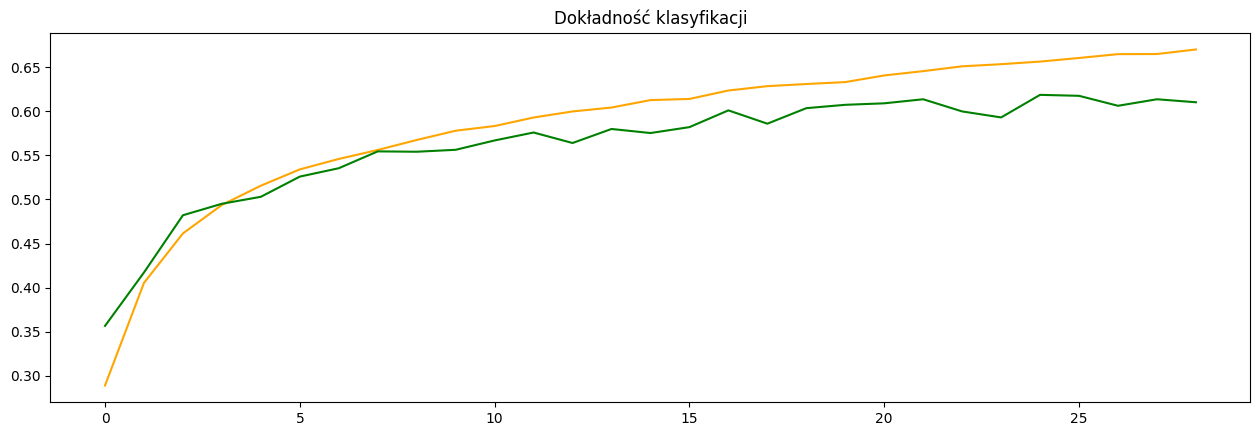

In [29]:
x_train, y_train, x_test, y_test = load_data()
x_train, x_test = normalize_pixels(x_train, x_test)
callbacks = EarlyStopping(monitor='val_loss', mode='min', patience=3)
model_2 = define_model_2()
graph_output = run_model(model_2)

In [32]:
def define_model_3(learning_rate=0.00001, decay_rate=0.0):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    optimizer = Adam(lr=learning_rate, decay=decay_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

Epoch 1/100
40/40 [==============================] - 2s 42ms/step - loss: 2.2982 - accuracy: 0.1299 - val_loss: 2.2763 - val_accuracy: 0.1750
Epoch 2/100
40/40 [==============================] - 1s 20ms/step - loss: 2.2622 - accuracy: 0.2031 - val_loss: 2.2463 - val_accuracy: 0.2305
Epoch 3/100
40/40 [==============================] - 1s 20ms/step - loss: 2.2314 - accuracy: 0.2482 - val_loss: 2.2136 - val_accuracy: 0.2529
Epoch 4/100
40/40 [==============================] - 1s 20ms/step - loss: 2.1958 - accuracy: 0.2763 - val_loss: 2.1752 - val_accuracy: 0.2884
Epoch 5/100
40/40 [==============================] - 1s 21ms/step - loss: 2.1558 - accuracy: 0.3038 - val_loss: 2.1353 - val_accuracy: 0.3114
Epoch 6/100
40/40 [==============================] - 1s 20ms/step - loss: 2.1155 - accuracy: 0.3211 - val_loss: 2.0969 - val_accuracy: 0.3241
Epoch 7/100
40/40 [==============================] - 1s 20ms/step - loss: 2.0767 - accuracy: 0.3355 - val_loss: 2.0591 - val_accuracy: 0.3374
Epoch 

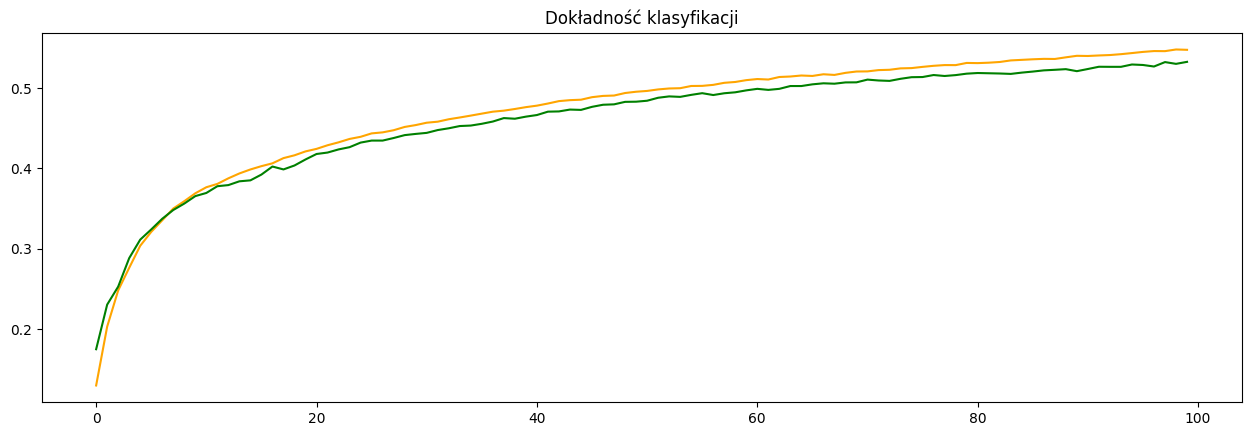

In [33]:
x_train, y_train, x_test, y_test = load_data()
x_train, x_test = normalize_pixels(x_train, x_test)
callbacks = EarlyStopping(monitor='val_loss', mode='min', patience=3)
model_3 = define_model_3()
graph_output = run_model(model_3)